# PUBG Data Description

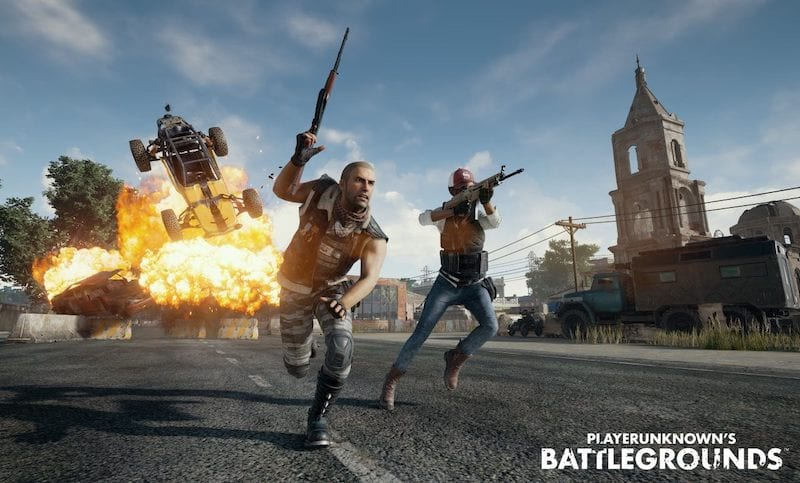

# Data fields

<br>**DBNOs**: - Number of enemy players knocked.</br>
<br>**assists:** - Number of enemy players this player damaged that were killed by teammates.</br>
<br>**boosts:** - Number of boost items used.</br>
<br>**damageDealt:** - Total damage dealt. Note: Self inflicted damage is subtracted.</br>
<br>**headshotKills:** - Number of enemy players killed with headshots.</br>
<br>**heals:** - Number of healing items used.</br>
<br>**Id** - Player’s Id</br>
<br>**killPlace** - Ranking in match of number of enemy players killed.</br>
<br>**killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.</br>
<br>**killStreaks** - Max number of enemy players killed in a short amount of time.</br>
<br>**kills** - Number of enemy players killed.</br>
<br>**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.</br>
<br>**matchDuration** - Duration of match in seconds.</br>
<br>**matchId** - ID to identify match. There are no matches that are in both the training and testing set.</br>
<br>**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.</br>
<br>**rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.</br>
<br>**revives** - Number of times this player revived teammates.</br>
<br>**rideDistance** - Total distance traveled in vehicles measured in meters.</br>
<br>**roadKills** - Number of kills while in a vehicle.</br>
<br>**swimDistance** - Total distance traveled by swimming measured in meters.</br>
<br>**teamKills** - Number of times this player killed a teammate.</br>
<br>**vehicleDestroys** - Number of vehicles destroyed.</br>
<br>**walkDistance** - Total distance traveled on foot measured in meters.</br>
<br>**weaponsAcquired** - Number of weapons picked up.</br>
<br>**winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.</br>
<br>**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.</br>
<br>**numGroups** - Number of groups we have data for in the match.</br>
<br>**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.</br>
<br>**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.</br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
def printmd(string):
    display(Markdown(string))

#### The size of the PUBG dataset is pretty big for a lower/mid-range laptop so here's a script to make the dataset smaller without losing information.

# Iterate over every column

**<br>Determine if the column is numeric</br>
<br>Determine if the column can be represented by an integer</br>
<br>Find the min and the max value</br>
<br>Determine and apply the smallest datatype that can fit the range of values.</br>
<br>This reduces the dataset </br>**

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
               
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
       
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train = pd.read_csv('data_Eda.csv')
train = reduce_mem_usage(train)

Memory usage of dataframe is 237.49 MB --> 72.10 MB (Decreased by 69.6%)


In [4]:
# Top 5 records
printmd('## 1.1. Data Sape')
print(train.shape)

## 1.1. Data Sape

(1111742, 30)


In [5]:
printmd('## 1.2. Data ')
train.head()

## 1.2. Data 

Unnamed: 0              Id         groupId         matchId  assists  \
0     2093518  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0   
1     3701672  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0   
2     2059784  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0   
3     1302036  b147e1bd448fc4  9a8991656b3fea  d931c0932d8aca        0   
4      297180  d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0   

   boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0       0    25.930000      0              0      0         84        1437   
1       0    36.709999      0              0      0         57        1225   
2       1    47.730000      0              0      0         50           0   
3       0     0.000000      0              0      0         56        1286   
4       2   100.000000      0              0      3         31           0   

   kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0      0            0        0.000           1403  squad-fpp        31   
1      0            0        0.000           1971  squad-fpp        30   
2      0            0        0.000           1741   solo-fpp        96   
3      0            0        0.000           1738  squad-fpp        28   
4      1            1        7.737           2193       solo        99   

   numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
0         29          -1        0      0.000000          0           0.0   
1         30          -1        0      0.000000          0           0.0   
2         89        1516        0   4088.000000          0           0.0   
3         27          -1        1      0.000000          0           0.0   
4         95        1482        0    918.400024          0           0.0   

   teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
0          0                0    151.300003                1       1525   
1          0                0   1918.000000                7       1516   
2          0                0    820.000000                7          0   
3          0                0     38.810001                0       1515   
4          0                0   1721.000000                5          0   

   winPlacePerc  
0        0.0667  
1        0.5862  
2        0.8105  
3        0.5556  
4        0.6429

In [6]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
train.head()

Id         groupId         matchId  assists  boosts  \
0  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0       0   
1  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0       0   
2  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0       1   
3  b147e1bd448fc4  9a8991656b3fea  d931c0932d8aca        0       0   
4  d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0       2   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0    25.930000      0              0      0         84        1437      0   
1    36.709999      0              0      0         57        1225      0   
2    47.730000      0              0      0         50           0      0   
3     0.000000      0              0      0         56        1286      0   
4   100.000000      0              0      3         31           0      1   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0        0.000           1403  squad-fpp        31         29   
1            0        0.000           1971  squad-fpp        30         30   
2            0        0.000           1741   solo-fpp        96         89   
3            0        0.000           1738  squad-fpp        28         27   
4            1        7.737           2193       solo        99         95   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0          -1        0      0.000000          0           0.0          0   
1          -1        0      0.000000          0           0.0          0   
2        1516        0   4088.000000          0           0.0          0   
3          -1        1      0.000000          0           0.0          0   
4        1482        0    918.400024          0           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0    151.300003                1       1525        0.0667  
1                0   1918.000000                7       1516        0.5862  
2                0    820.000000                7          0        0.8105  
3                0     38.810001                0       1515        0.5556  
4                0   1721.000000                5          0        0.6429

In [8]:
train.tail()

Id         groupId         matchId  assists  boosts  \
1111737  43739241d6a8e8  afb7c87045825e  ad5719d2422207        0       0   
1111738  d57c8a22a9e38b  85e0624ddd2cb0  c3f50eef6dbb01        0       3   
1111739  c7ad131758ba55  b3759687b385b3  990a8d68ec2bc4        0       0   
1111740  8237d06ea2c508  13a05023ab7735  f93b1f0defaee5        1       4   
1111741  9beb0064c56445  5cfa1834dc5b11  0406ce4ab7a1bd        5       3   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1111737    70.309998      0              0      0         68           0   
1111738   334.100006      0              0      1         10           0   
1111739   119.300003      1              0      0         25           0   
1111740    53.509998      1              0      7         45           0   
1111741   607.400024      3              0      3         15        1691   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
1111737      0            0     0.000000           1390  squad-fpp        29   
1111738      2            1   179.600006           2030   solo-fpp        97   
1111739      1            1     2.804000           1909        duo        47   
1111740      0            0     0.000000           1299  squad-fpp        31   
1111741      2            2    52.520000           1370  squad-fpp        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1111737         29        1472        0      0.000000          0   
1111738         92        1508        0   1549.000000          0   
1111739         47        1494        0      0.000000          0   
1111740         30        1627        1   3610.000000          0   
1111741         26          -1        0    713.900024          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1111737         0.000          0                0    799.799988   
1111738         0.000          0                0   2777.000000   
1111739         0.000          0                0     60.450001   
1111740         0.000          1                0   2209.000000   
1111741         8.912          0                0   3713.000000   

         weaponsAcquired  winPoints  winPlacePerc  
1111737                2          0        0.3929  
1111738                7          0        0.8542  
1111739                1          0        0.7174  
1111740                4          0        0.9000  
1111741                5       1611        1.0000

In [9]:
printmd('## 1.1. Data Information')
train.info()

## 1.1. Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int8   
 4   boosts           1111742 non-null  int8   
 5   damageDealt      1111742 non-null  float32
 6   DBNOs            1111742 non-null  int8   
 7   headshotKills    1111742 non-null  int8   
 8   heals            1111742 non-null  int8   
 9   killPlace        1111742 non-null  int8   
 10  killPoints       1111742 non-null  int16  
 11  kills            1111742 non-null  int8   
 12  killStreaks      1111742 non-null  int8   
 13  longestKill      1111742 non-null  float32
 14  matchDuration    1111742 non-null  int16  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

# EDA - Exploratory Data Analysis

## Frequecy of different types of match

Text(0.5, 1.0, 'Frequecy of different types of match')

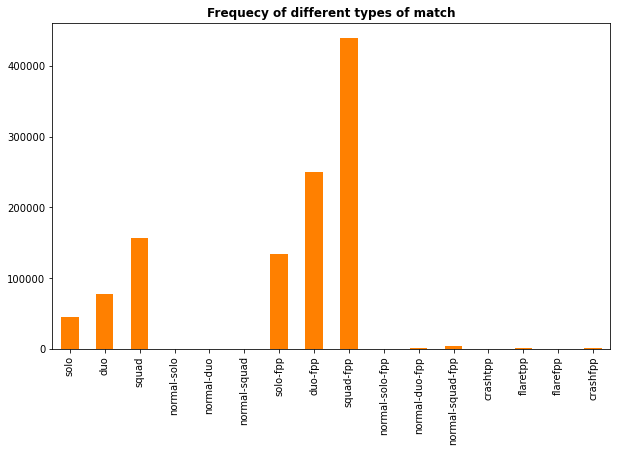

In [10]:
printmd('## Frequecy of different types of match')
matchTypes = ["solo", "duo", "squad", "normal-solo", "normal-duo", "normal-squad", "solo-fpp", "duo-fpp", "squad-fpp", "normal-solo-fpp", "normal-duo-fpp", "normal-squad-fpp", "crashtpp", "flaretpp", "flarefpp", "crashfpp"]
train["matchType"].value_counts()[matchTypes].plot(kind="bar", figsize=(10,6), color="#ff8000")
plt.title("Frequecy of different types of match", fontweight="bold")

Text(0.5, 1.0, 'Kill Counts')

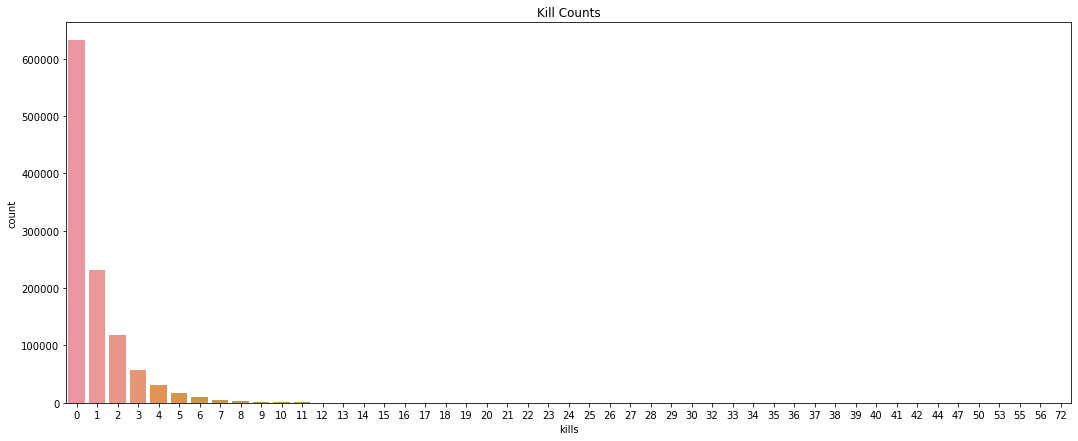

In [11]:
# Frequency of Kill Counts
plt.subplots(figsize=(18,7))
sns.countplot(train['kills']).set_title("Kill Counts")

In [12]:
# Longest Survival Duration
train["damageDealt"].max()

5990.0

In [13]:
# win without damage
without_damage = train[train["damageDealt"]==0]
winning = len(without_damage[without_damage["winPlacePerc"]==1])
# longest ply duration
duration = len(train[train["matchDuration"]==2237])
# win without single kill
without_kill = train[train["kills"]==0]
without_kill_count = len(without_kill[without_kill["winPlacePerc"]==1])

In [14]:
print(f"{winning} player win without dealing with damage")

print(f"{duration} player plays longest survival match")

print(f"{without_kill_count} player win without single kill")


1199 player win without dealing with damage
21 player plays longest survival match
4197 player win without single kill


# UNIVARIATE ANALYSIS

In [15]:
wins_modr_best = []
for val in list(train.winPlacePerc.unique()):
    if val > 0.45:
        wins_modr_best.append(val)
    else:
        continue
print(train.winPlacePerc.nunique())
print(pd.Series(wins_modr_best).nunique())

2557
1405


In [16]:
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib as ml
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('ggplot')

init_notebook_mode(connected=True)

winner = train[train.winPlacePerc==1]
loser = train[train.winPlacePerc==0]

fig = go.Figure(data=[go.Pie(labels=['Won','Lost','Drew/Others'],
                             values=[winner.shape[0],loser.shape[0],train.shape[0]-(winner.shape[0]+loser.shape[0])])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [17]:
match_types = list(train.matchType.value_counts().values)
labels = list(train.matchType.value_counts().index)

# Plot a pie chart to show which game type is more popular
fig = go.Figure(data=[go.Pie(labels=labels, values=match_types, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

### So we see that Squad-FPP is the most popular match type, followed by Duo-FPP. Normal-Duo is the least played game type.

# MULTIVARIATE ANALYSIS¶


In [18]:
pw = train[train['winPlacePerc'] == 1]
pl = train[train['winPlacePerc'] == 0]

In [19]:
for_win = list(pw.matchType.value_counts().values)
for_loss = list(pl.matchType.value_counts().values)

fig = go.Figure(data=[
    go.Bar(name='WON', x=list(pw.matchType.values), y=for_win),
    go.Bar(name='LOST', x=list(pl.matchType.values), y=for_loss)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# CONCLUSIONS :

**<br>Even though Squad-FPP is the most popular match type, it has more losses to its name.</br>
<br>Duo-FPP is the second most popular match type and has listed no cases of match loss.</br>
<br>Squad is the 3rd most popular match type, but records more wins than Squad-FPP.</br>
<br>Duo is an unpopular match type and is justified by the fact that it accounts to most number of losses.</br>**

([<matplotlib.patches.Wedge at 0x2d905f58>,
 [Text(-0.24252342877711222, 1.0729316783906575, 'duo'),
  Text(-1.0069610080084876, 0.4427522200402056, 'duo-fpp'),
  Text(-1.000861260040812, -0.4563734634589509, 'solo'),
  Text(-0.6494461764795877, -0.8878173595149199, 'solo-fpp'),
  Text(0.21395310096025208, -1.0789921550175852, 'squad'),
  Text(1.0438531099540735, 0.3469447864418905, 'squad-fpp')],
 [Text(-0.13228550660569754, 0.5852354609403585, '7.08%'),
  Text(-0.5492514589137205, 0.2415012109310212, '22.66%'),
  Text(-0.5459243236586246, -0.24893098006851866, '4.14%'),
  Text(-0.35424336898886594, -0.4842640142808653, '12.14%'),
  Text(0.11670169143286475, -0.5885411754641373, '14.20%'),
  Text(0.5693744236113129, 0.18924261078648572, '39.79%')])

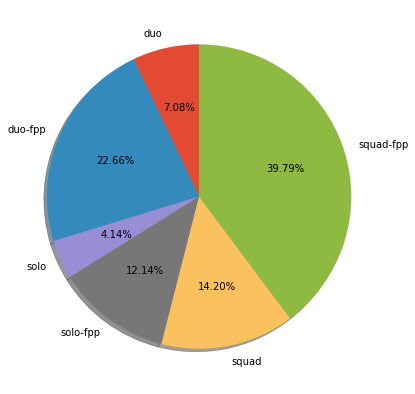

In [20]:
match_count = train.groupby(['matchType']).size().reset_index() #total size (count) of each match in match type
match_count[0] = match_count[0]/train.shape[0]*100  # playing % of each match
match_count.drop(match_count[match_count[0] < 1].index, axis=0, inplace=True) #Deleting the match which have playing percentage less than 1%
fig, ax1 = plt.subplots(figsize=(16,7))
ax1.pie(match_count[0], labels=match_count['matchType'], autopct='%1.2f%%', shadow=True, startangle=90)

**From the pie chart it is clear that the players like to play fpp (First Person Perspective) matches rather than classic 'solo', 'duo' or 'squad'. The playing percentage of 'normal-solo-fpp','normal-squad','normal-duo-fpp' and 'normal-squad-fpp' is less than 0% as most cheates like to play in this match.
Let's see how kills and win Percentage (winPlacePerc) are related to each other in each match type.**

Text(0.5, 1.0, 'Win percentage vs Kills for different matches')

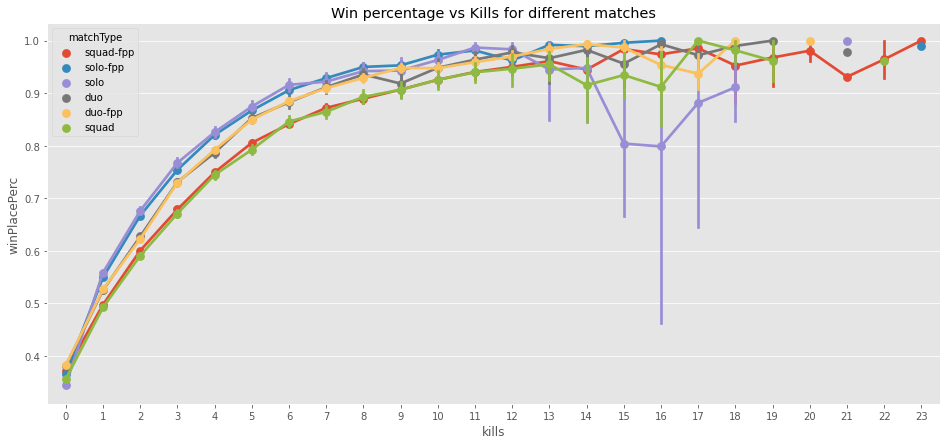

In [21]:
match_to_keep = ['squad-fpp','squad','solo-fpp','solo','duo-fpp','duo']
most_match = train[train.matchType.isin(match_to_keep)] #Getting only matches with has playing % more than 1
fig, ax1 = plt.subplots(figsize=(16,7))
sns.pointplot(x='kills', y='winPlacePerc', hue='matchType', data=most_match, ax=ax1)
plt.title('Win percentage vs Kills for different matches')

# heal vs win percentage

In [22]:
# Player group... In solo no group, in duo minimum 50 group and in squad (25 * 4) minimum 25 group
solo_game = train[train["numGroups"] > 50]
solo = len(solo_game)

duo_game = train[(train["numGroups"] > 25) & (train["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = train[train["numGroups"] <= 25]
squad = len(squad_game)

In [23]:
print(f"{solo} solo game player\n {duo} player in duo\n and {squad} player in squad")

177161 solo game player
 824015 player in duo
 and 110566 player in squad


In [24]:
solo_game

Id         groupId         matchId  assists  boosts  \
2        9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0       1   
4        d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0       2   
5        e705cb7a4446ea  9d7180a567d020  b146588581df18        0       0   
6        e253262031e08f  e5df2dcdaf3f4b  c1385ae84655e6        0       0   
7        c264a5ce0d4ca1  0efbbf391d7f62  b280791eb7a3fd        0       8   
...                 ...             ...             ...      ...     ...   
1111702  616af81139f010  5fc90329091b63  bbab279d6b8189        0       0   
1111710  cec608775bf006  e4d8f7af5dccbb  e0248a01c8be33        0       1   
1111715  729efc24aab8f4  2d64d3e37a7d14  ad77c274378efb        0       1   
1111736  a87134976177e4  b22d88e51a064b  175b0cabe633c0        0       0   
1111738  d57c8a22a9e38b  85e0624ddd2cb0  c3f50eef6dbb01        0       3   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2          47.730000      0              0      0         50           0   
4         100.000000      0              0      3         31           0   
5           0.000000      0              0      0         59           0   
6           0.000000      0              0      0         81           0   
7         170.199997      0              0      1         25           0   
...              ...    ...            ...    ...        ...         ...   
1111702   147.300003      0              0      0         42        1157   
1111710   218.399994      0              0      0         20           0   
1111715   225.899994      0              0      1         21           0   
1111736     0.000000      0              0      0         87           0   
1111738   334.100006      0              0      1         10           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
2            0            0     0.000000           1741  solo-fpp        96   
4            1            1     7.737000           2193      solo        99   
5            0            0     0.000000           1358  solo-fpp        94   
6            0            0     0.000000           1497  solo-fpp        99   
7            1            1    32.959999           1968  solo-fpp        97   
...        ...          ...          ...            ...       ...       ...   
1111702      1            1     9.323000           1967  solo-fpp        95   
1111710      2            1    27.820000           1442  solo-fpp        91   
1111715      2            1    13.720000           1394  solo-fpp        95   
1111736      0            0     0.000000           1515      solo        95   
1111738      2            1   179.600006           2030  solo-fpp        97   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
2               89        1516        0   4088.000000          0   
4               95        1482        0    918.400024          0   
5               90        1503        0      0.000000          0   
6               98        1464        0      0.000000          0   
7               94        1544        0      0.000000          0   
...            ...         ...      ...           ...        ...   
1111702         94          -1        0      0.000000          0   
1111710         88        1534        0      0.000000          0   
1111715         92        1696        0      0.000000          0   
1111736         94        1507        0      0.000000          0   
1111738         92        1508        0   1549.000000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2                 0.0          0                0    820.000000   
4                 0.0          0                0   1721.000000   
5                 0.0          0                0    446.000000   
6                 0.0          0                0     45.860001   
7               221.0          0                0   3297.000000   
...               ...      

Text(14, 0.67, 'squad-heal vs win perc')

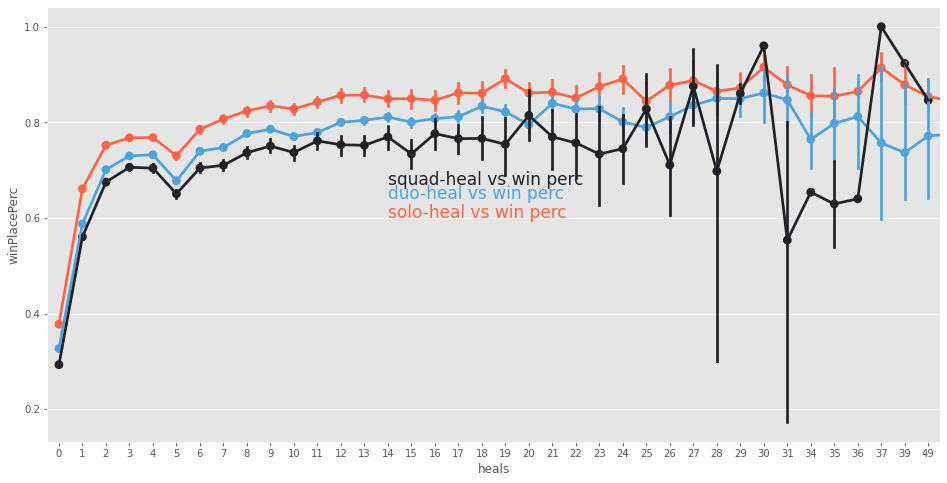

In [25]:
# heal vs win percentage
plt.subplots(figsize=(16, 8))
sns.pointplot(x=solo_game["heals"], y=solo_game["winPlacePerc"], color="#ff6347")
plt.text(14,0.6, 'solo-heal vs win perc',color='#ff6347',fontsize = 17)
sns.pointplot(x=duo_game["heals"], y=duo_game["winPlacePerc"], color="#4ca3dd")
plt.text(14,0.64, 'duo-heal vs win perc',color='#4ca3dd',fontsize = 17)
sns.pointplot(x=squad_game["heals"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.67, 'squad-heal vs win perc',color='#212126',fontsize = 17)

In [26]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', train[i].nunique())

unique [Id] count: 1111742
unique [groupId] count: 870622
unique [matchId] count: 47951


<AxesSubplot:>

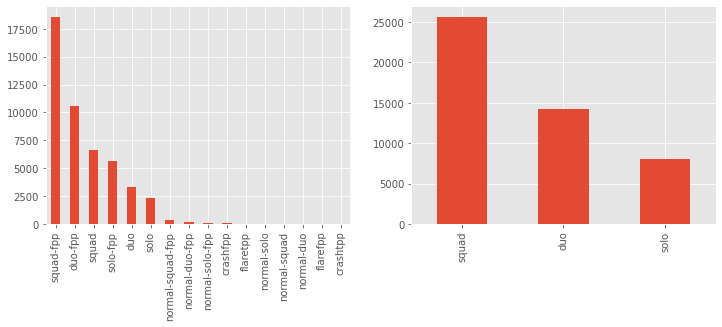

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#The first() function (convenience method ) is used to subset initial periods of time series data based on a date offset.
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

#Converting solos-fpp etc to a single category solo and likewise other categories are modified with mapper function

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

# Player Analysis
**During a game, 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.**

In [28]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = train.groupby(['matchType','matchId']).size().to_frame('players in match')
group = train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['players in group'],['min','mean','max'])]], axis=1)

players in match                  players in group                
                       min       mean   max              min      mean   max
matchType                                                                   
duo                    1.0  23.282771  39.0              1.0  1.164937  16.0
solo                   1.0  22.266972  42.0              1.0  1.016110  16.0
squad                  1.0  23.420215  42.0              1.0  1.467716  17.0

In [29]:
print(group['players in group'].nlargest(5))

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    17
duo        7e93ce71ac6f61  7385e5fe214021    16
solo       41a634f62f86b7  128b07271aa012    16
squad      d69074849fb3db  6a292d4d1a0207    12
duo        3e029737889ce9  b8275198faa03b    11
Name: players in group, dtype: int64


In [30]:
subset = train[train['matchId']=='3e029737889ce9']
sub_grp = subset[subset['groupId']=='b8275198faa03b']

print('matchId ==\'3e029737889ce9\' & groupId ==\'b8275198faa03b\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())


matchId =='3e029737889ce9' & groupId =='b8275198faa03b'
--------------------------------------------------
players: 21
groups: 10
numGroups: [14]
maxPlace: [50]
--------------------------------------------------
max-group players: 11
max-group winPlacePerc: [0.2449]
--------------------------------------------------
winPlacePerc: [0.     0.0204 0.0408 0.0612 0.0816 0.1837 0.2245 0.2449 0.5102 1.    ]


# Check correlation of the feature with Winning Percentage

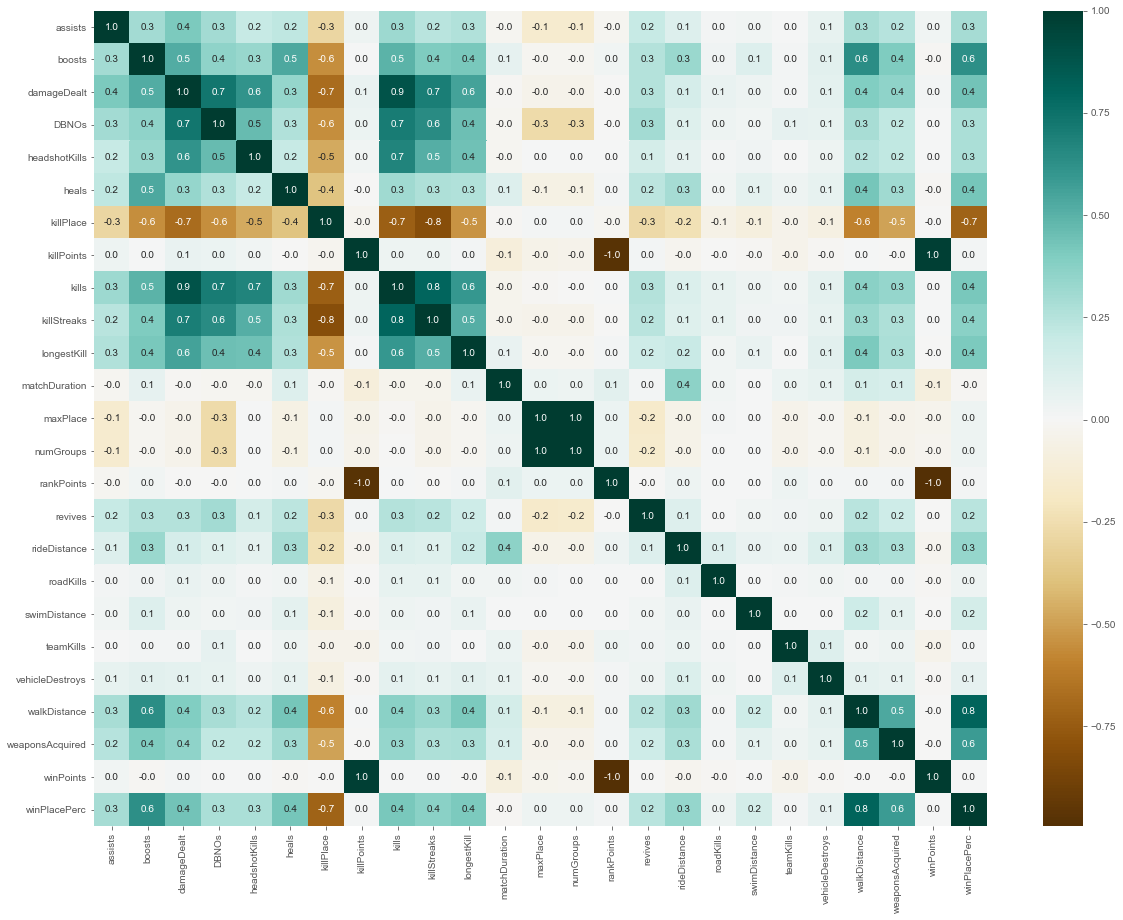

In [31]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

# Analysing the Kills

In [32]:
print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

On an average a person kills 0.9255 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


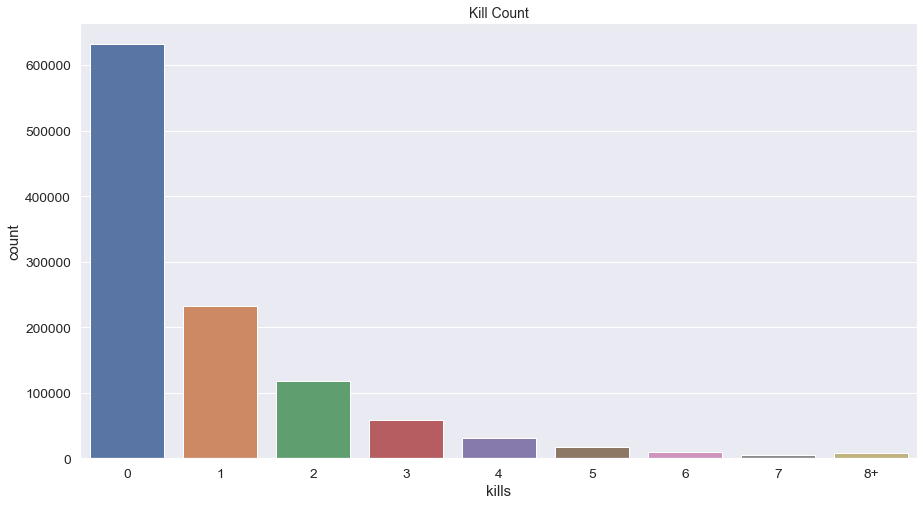

In [33]:
data = train.copy()

data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()

### It seems most of the people cannot even make a single kill. But atleast they deal with some damage

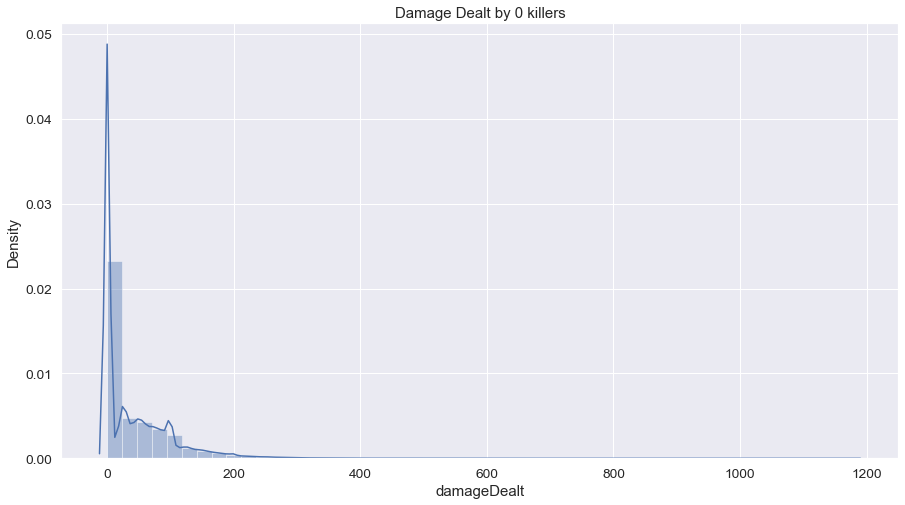

In [34]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

### Well there are few people who win without even making a single kill or dealing with damage.

In [35]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

#PLAYERS AFK - SPAWN
data1 = train[train['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

A total of 4197 players (0.3775%) have won without a single kill!
A total of 1199 players (0.1078%) have won without dealing damage!


# Effect of Kiiling on Winning percentage

**As shown below by the increasing mean of win percentage placement, we found that kill count was correlated with our target variable, which makes sense because more kills usually means a player is better skilled and will rank closer to the top.**

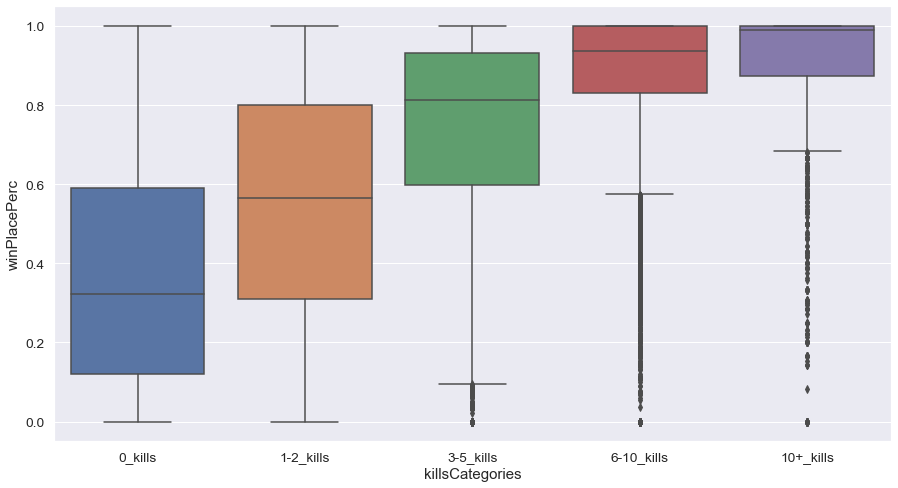

In [36]:
kills = train.copy()

#CUT() -> SEGREGATES YOUR DATA & CONVERTS CONTINOUS TO CATEGORICAL
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

### Inference: kills has a high correlation with winPlacePerc.

# Analysing Running

In [37]:
print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

24556 players (2.0422%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


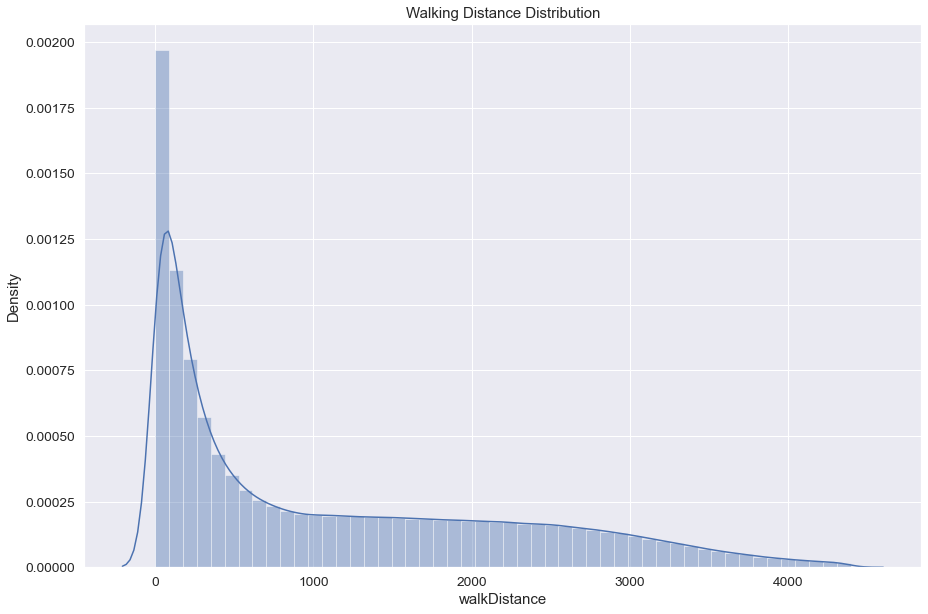

In [38]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

# Analysing Running: Effect of Running on Winning Percentage

The scatter plot below indicates there is a high correlation between running and winning percentage. This isn’t something new since the longer you’re alive, the more you run and more is the chance of winning.

# jointplot
**A marginal plot or joint plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.**

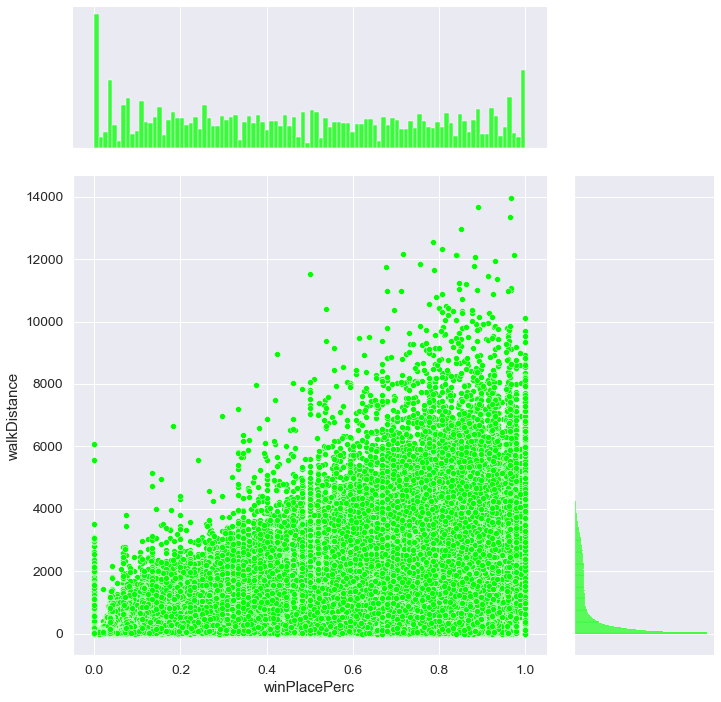

In [39]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

### Inference: Walking has a high correlation with winPlacePerc.

# Analysing Riding

In [40]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

An average person drives for 604.2m, 99% of people have drived 6968.0m or less, while THE RIDER rode for 35400.0m.


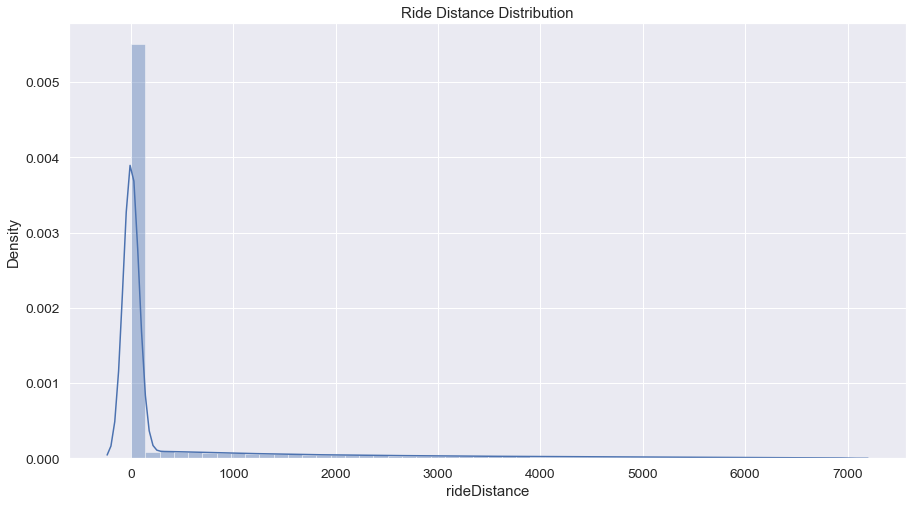

In [41]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [42]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they like trekking more than riding.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

827573 players (23.0811%) drived for 0 meters. This means that they like trekking more than riding.


# Analysing Riding: Effect of Riding on Winning Percentage

In [43]:
#sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
#plt.show()

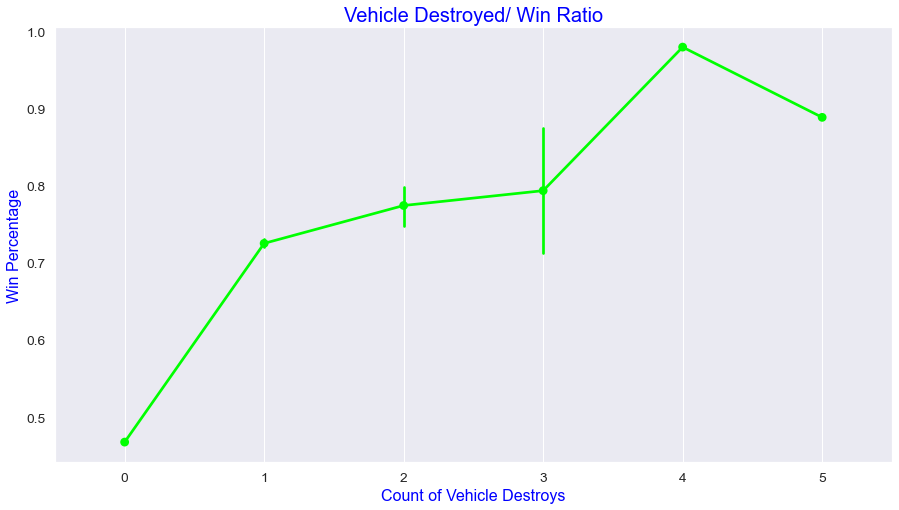

In [44]:
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='lime',alpha=0.5)
plt.xlabel('Count of Vehicle Destroys',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Vehicle Destroyed/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

Inference: Destroying vehicles increases your chances of winning!

# Analysing Healing and Boosting

In [45]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 73.
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 24.


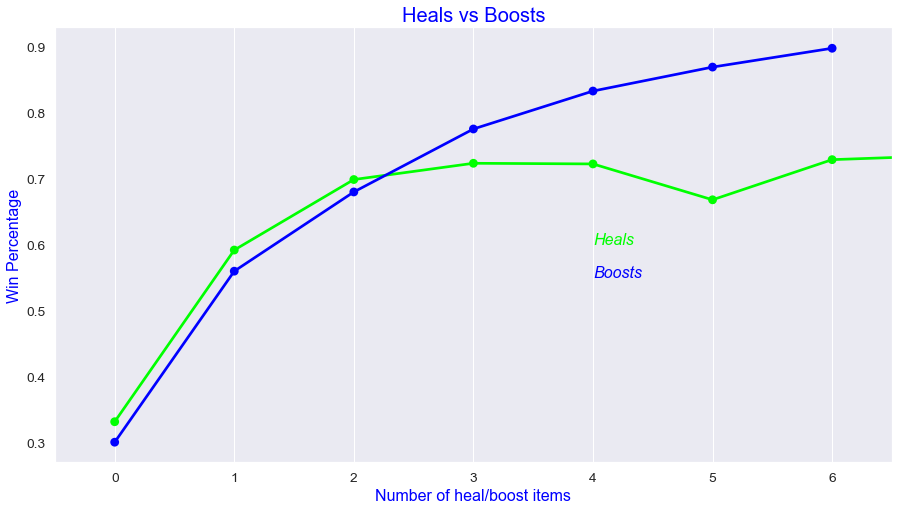

In [46]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 16,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 16,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

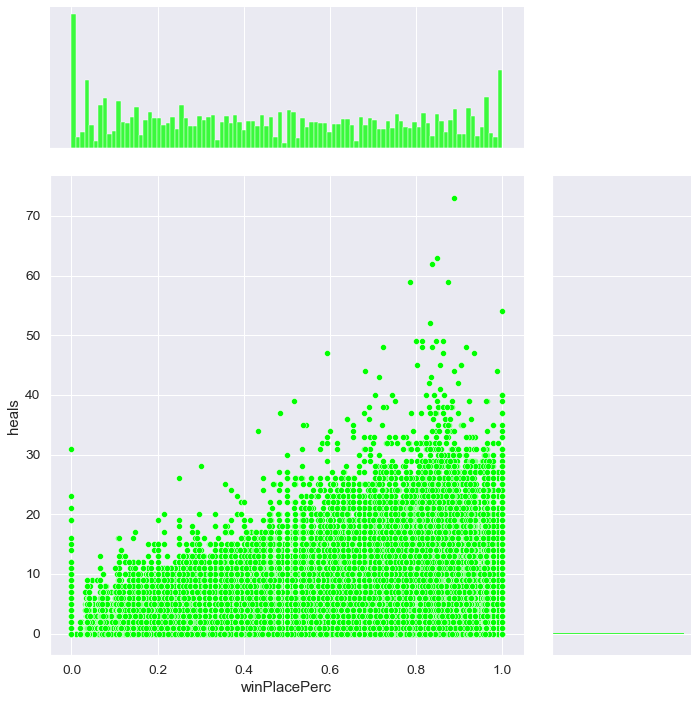

In [47]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

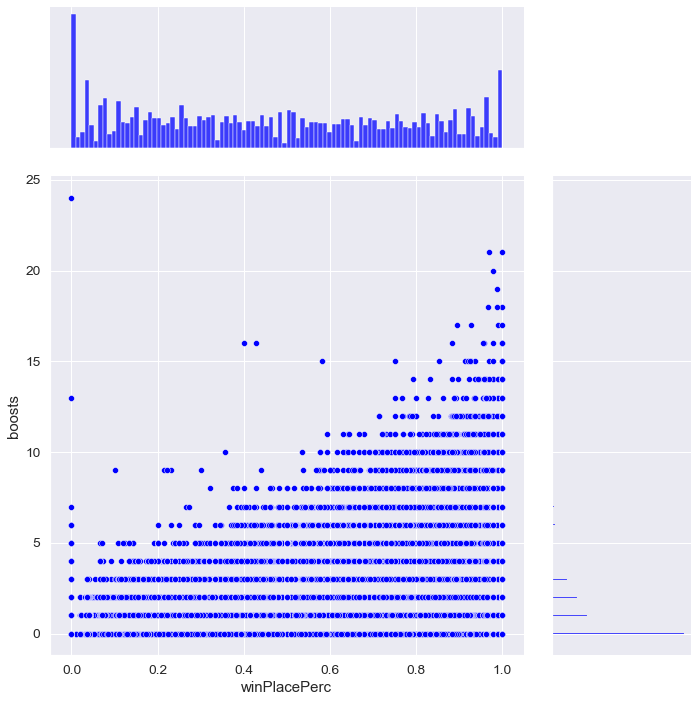

In [48]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

### Inference: Both healing and boosts have a high correlation with winning, however boosts matter more. Both the plots shows abnormal behaviour at 0

# DEFINE :
What percentage of players won their games even after zero kills and zero damages ? Is hiding still a strong competitior to conventional strategy of damage-kill-cover ?

In [49]:
# Percentage of zero kills winners
colors1 = ['maroon','green']
colors2 = ['yellow']
fig = go.Figure(data=[go.Pie(labels=['ZERO KILLS','OTHERS'],
                             values=[pw[pw.kills==0].shape[0],(pw.shape[0]-pw[pw.kills==0].shape[0])])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors1,line=dict(color='#000000', width=2)))
fig.show()

# Percentage of zero damage winners
fig = go.Figure(data=[go.Pie(labels=['ZERO DAMAGE','OTHERS'],
                             values=[pw[pw.damageDealt==0].shape[0],(pw.shape[0]-pw[pw.damageDealt==0].shape[0])])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors2,line=dict(color='#000000', width=2)))
fig.show()

# CONCLUSION :
**<br>Only 13.1% of players acheive victory with zero kills, which is not a convincing number.</br>
<br>Only 3.74% of players acheive victory with zero damage, which is not a convincing number at all.</br>
<br>It is the best to follow the threshold and try to play by acheiving kills and inflicting enough damage to ensure victory.</br>**

# Effect of Killing in different Game type: Solo, Duos and Squad on Winning Percentage

In [50]:
solos = train[train['numGroups']>50] #Solo game played by more than 50 different groups
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)] #Duo game can consist of a maximum of 50 groups(50x2=100) 
squads = train[train['numGroups']<=25] # Squad game can consist a maximum of 25 groups(25x4=100)
print("{} ({:.2f}%) of games are solo, {} ({:.2f}%) are duo and {} ({:.2f}%) are squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))


177161 (15.94%) of games are solo, 824015 (74.12%) are duo and 110566 (9.95%) are squad games.


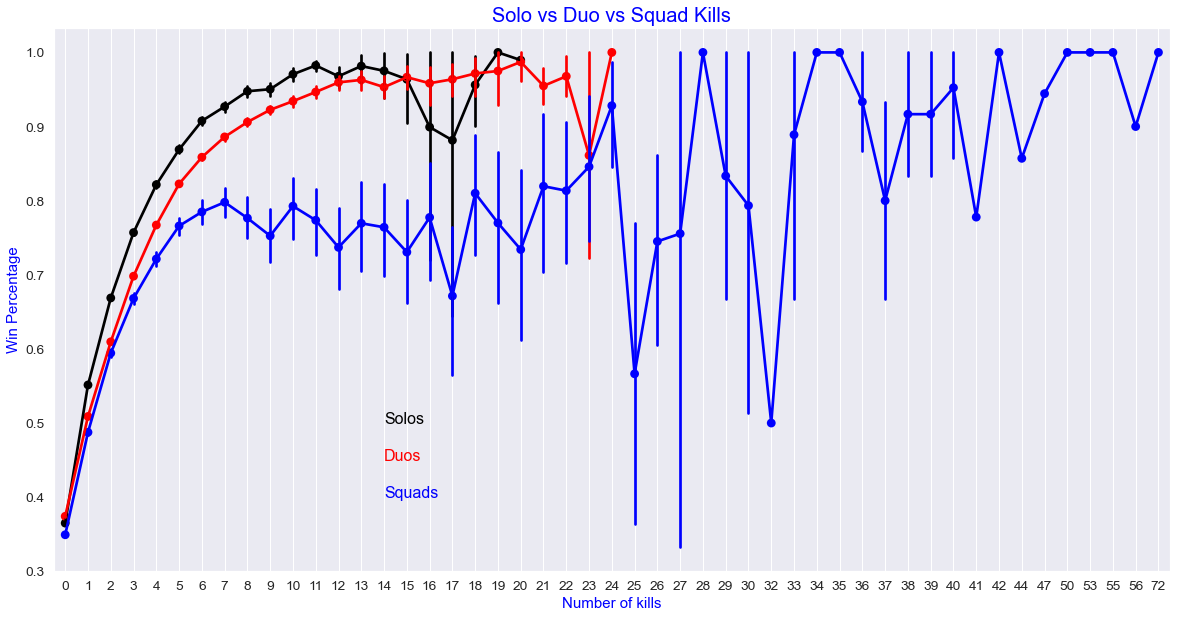

In [51]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.6)
plt.text(14,0.5,'Solos',color='black',fontsize = 16)
plt.text(14,0.45,'Duos',color='red',fontsize = 16)
plt.text(14,0.4,'Squads',color='blue',fontsize = 16)
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Inference: Solos and duos behave the same, but when playing squads kills don't matter that much.

# Anomalies in Killing: Aim Hacks
**Battleground AimbotsThe use of automated aiming software is without a doubt one of the most powerful cheats that can be used in Playerunknowns Battlegrounds at this time. It allows players to bind a key or mouse button to an auto aim and lock on function that will automatically target any ememy in line of sight. If you are playing duo or in a group, group members will not trigger this function. A trigger bot can then be set to automatically shoot for you or you can chose to shoot yourself.**

### Calculating the totalDistance travelled by a player which is the sum total of rideDistance, walkDistance adn swimDistance

In [52]:
# Engineer a new feature _totalDistance
train['_totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']

**Create a new feature 'headshot_rate'. We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!**

In [53]:
train['_headshot_rate'] = train['headshotKills'] / train['kills']
train['_headshot_rate'] = train['_headshot_rate'].fillna(0)

In [54]:
#Defining some functions for plotting graphs, we will be needing a lot of countplot and distplot
def show_countplot(column):
    plt.figure(figsize=(15,8))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(15, 8))
    sns.distplot(train[column], bins=50)
    plt.show()

# Inhumane kills
Some rows in our dataset have weird characteristics. The players could be fraudsters, maniacs or just anomalies. Removing these outliers will likely improve results.

Let's take a look at the players who make these shots.

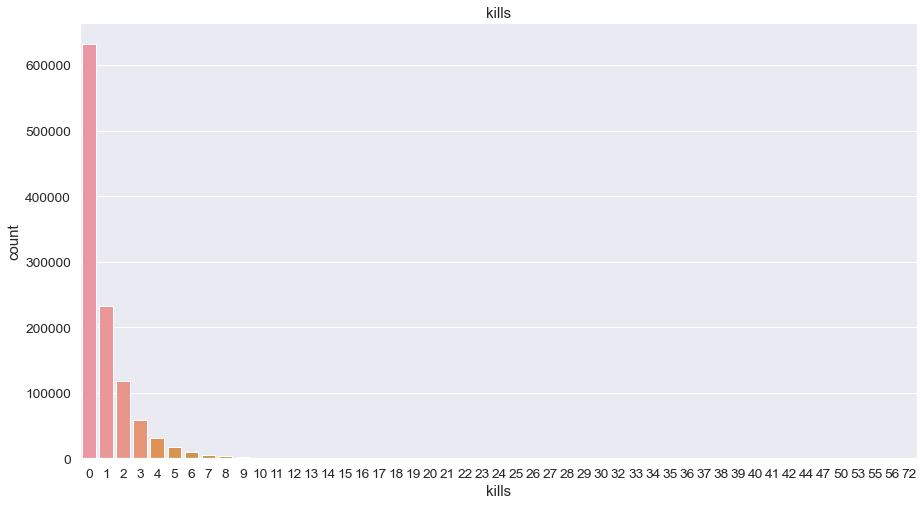

In [55]:
show_countplot('kills')

In [56]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?
train[(train['kills'] >= 40) & (train['weaponsAcquired'] > 55) & (train['_totalDistance'] < 100.0)]

Id         groupId         matchId  assists  boosts  \
1036315  2ade4369bccd12  9f9e64a3db8384  e024bf51bf1799       12       0   
1062585  f241fdbb4f94c6  fadbbc4cbb3e06  e024bf51bf1799        9       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1036315       5557.0      0              7      4          1           0   
1062585       3707.0      0              5      1          5           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
1036315     55            6    74.790001           1798      solo        19   
1062585     41            4   188.100006           1798      solo        19   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1036315         18        1500        0           0.0          0   
1062585         18        1500        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1036315           0.0          0                0     85.550003   
1062585           0.0          0                0     46.709999   

         weaponsAcquired  winPoints  winPlacePerc  _totalDistance  \
1036315               66          0        1.0000       85.550003   
1062585               72          0        0.7778       46.709999   

         _headshot_rate  
1036315        0.127273  
1062585        0.121951

In [57]:
# Is it even possible to kill more than 40 people without using any heals?
train[(train['kills'] >= 40) & (train['heals'] == 0)]

Id         groupId         matchId  assists  boosts  \
373851  579949f753978c  108f4c00d80882  ff9cd80c0d8fb7        1       2   

        damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
373851       3680.0      0             35      0          1        1000   

        kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
373851     40           20   621.799988            799     squad        10   

        numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
373851         10          -1        0           0.0          0           0.0   

        teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
373851          0                0        1180.0                2       1500   

        winPlacePerc  _totalDistance  _headshot_rate  
373851           1.0          1180.0           0.875

# 100% Headshot Kills

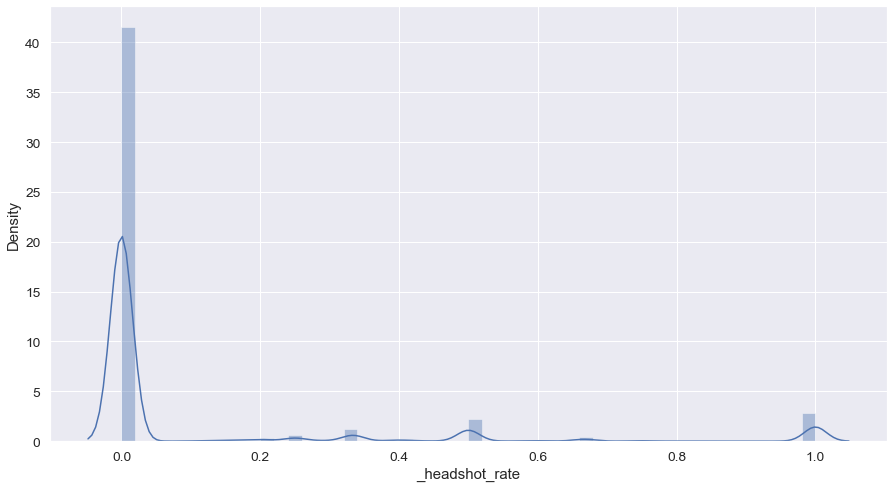

In [59]:
# Plot the distribution of headshot_rate
show_distplot('_headshot_rate')

In [60]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)
display(train[(train['_headshot_rate'] == 1) & (train['kills'] >=10)].shape)
train[(train['_headshot_rate'] == 1) & (train['kills'] >= 10)].head(10)

(4, 31)

Id         groupId         matchId  assists  boosts  \
445360  d8474df8d8283a  50c8a5b906d89d  c6da477a07f4aa        0       7   
577809  c4f80d4be5c561  b4a7892189b5dd  c7f7733ebbd447        0       4   
596325  044d18fc42fc75  fc1dbc2df6a887  628107d4c41084        3       5   
856491  1bd6fd288df4f0  90584ffa22fe15  ba2de992ec7bb8        2       6   

        damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
445360       1569.0      0             14      0          1           0   
577809       1065.0      6             10      1          1        1391   
596325       1620.0     13             11      3          1        1424   
856491       1355.0     12             10      2          1        1543   

        kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
445360     14            2   453.799988           1964      solo        95   
577809     10            2   222.000000           1246     squad        27   
596325     11            2   633.599976           1727     squad        27   
856491     10            2   277.000000           1417     squad        27   

        numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
445360         92        1547        0   2785.000000          0           0.0   
577809         27          -1        0    408.899994          0           0.0   
596325         26          -1        3   4720.000000          0           0.0   
856491         26          -1        0   1018.000000          0           0.0   

        teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
445360          0                0        2209.0                3          0   
577809          0                0        2450.0                7       1468   
596325          0                0        3422.0                8       1560   
856491          0                0        2458.0                4       1562   

        winPlacePerc  _totalDistance  _headshot_rate  
445360           1.0     4994.000000             1.0  
577809           1.0     2858.899902             1.0  
596325           1.0     8142.000000             1.0  
856491           1.0     3476.000000             1.0

### It is unclear if these players are cheating or are the legends so for now we are not deleting these players from the dataset.

# Killing without Moving
**Identify the fraudsters who can making kills without even moving. So for this we first identify the totalDistance travelled by a player and then set a boolean value to True if someone got kills without even moving a single inch.**

In [61]:
# Create feature killsWithoutMoving
train['_killsWithoutMoving'] = ((train['kills'] > 0) & (train['_totalDistance'] == 0))
# Check players who kills without moving
display(train[train['_killsWithoutMoving'] == True].shape)
train[train['_killsWithoutMoving'] == True].head(10)

(375, 32)

Id         groupId         matchId  assists  boosts  \
1267   c80731765f5704  68345b2f762dc8  d38a14fb160874        5       0   
2977   32cc8af554977f  a44a18784c7ad0  732c3b752e055f        1       0   
5585   1ed752158c7bbc  338d6ab3bf5f19  4c6b1a0e4cb346        1       0   
9700   d4b5b144dbb5df  1e27daf256b9ad  59cd3bc39072e8        4       0   
10092  861fd334addd94  15ba030fd830cc  ed41b4340cd7af        1       0   
14025  a4d301a7407a07  25d19b1bf31ea3  cd535385c94139        0       2   
14964  e88981e06fc0e7  d1cbdec91221d1  1aca7a1fad63bf        2       0   
16337  778e65309ef561  69c8c987979fb0  31179d2d545bba        2       0   
17352  11463dca072357  055188f5012302  7dbdfc03179137        1       2   
19418  96805fcf390f3e  dbe66c2c54cc90  3ebf1bf8bc6bae        4       4   

       damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
1267   1075.000000      0              1      1         12        1000      9   
2977    190.300003      0              0      0         37           0      1   
5585    369.600006      0              1      2         31           0      4   
9700    656.099976      4              0      7         37        1000      3   
10092   524.400024      0              0      2         20        1000      5   
14025   297.299988      5              2      8         29        1000      4   
14964  1902.000000      0              0      1          1        1000     23   
16337   520.400024      5              1      0         24           0      4   
17352   570.400024      0              3      1         11           0      5   
19418  1182.000000      0              6      8         12        1000     12   

       killStreaks  longestKill  matchDuration matchType  maxPlace  numGroups  \
1267             3    73.750000            532     squad         8          8   
2977             1     0.999100           1939      solo        93         90   
5585             1   129.100006           1794     squad         2          2   
9700             1    61.480000           1063     squad         5          5   
10092            1   172.300003           1223       duo        12         11   
14025            1    21.639999            898     squad         6          6   
14964            3   175.100006            996     squad         6          6   
16337            2    38.340000            676     squad         6          6   
17352            1   999.000000            897     squad         3          3   
19418            2   192.699997           1136      solo        30         17   

       rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
1267           -1        0           0.0          0           0.0          0   
2977         1579        0           0.0          0           0.0          0   
5585         1500        0           0.0          0           0.0          2   
9700           -1        1           0.0          0           0.0          0   
10092          -1        0           0.0          0           0.0          0   
14025          -1        2           0.0          0           0.0          0   
14964          -1        0           0.0          0           0.0          0   
16337        1500        3           0.0          0           0.0          0   
17352        1500        0           0.0          0           0.0          0   
19418          -1        0           0.0          0           0.0          0   

       vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
1267                 0           0.0               19       1500   
2977                 0           0.0                1          0   
5585                 0           0.0               27          0   
9700                 0           0.0               22       1500   
10092                0           0.0               14       1500   
14025                0           0.0               13       1500   
14964                0           0.0               29       150

# Longest Kill
Most kills are made from a distance of 100 meters or closer. However there are some players (outliers) who make a kill from more than 1km away. These players are probably fraudsters.

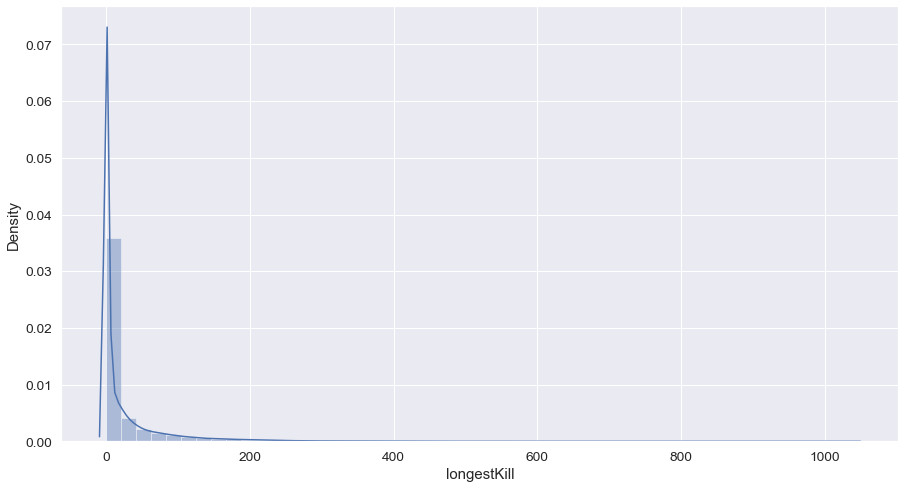

In [63]:
show_distplot('longestKill')

Is it even posssible to snipe (kill) someone from a distance > 1Km in this game?

Let's take a look at the players who took these shots.

In [67]:
# 1) Max DBNOs
print("Sir knocks a lot! - Max DBNOs:", max(train.DBNOs))

# 2) Max assists in single match
print("Best assistant! - Max assists in a match:", max(train.assists))

# 3) Max number of Boosts
print("On a pill! - Max number of boosts:", max(train.boosts))

# 4) Max damage dealt
print("The berserker! - Max damage dealt:", max(train.damageDealt))

# 5) Max headshot kills
print("The Sniper! - Max number of headshot kills:", max(train.headshotKills))

# 6) Max heals
print("The doctor! - Max number of health packs used in a match:", max(train.heals))

# 7) Max kills
print("The killing machine! - Max number of kills in a match:", max(train.kills))

# 8) Max match duration
print("Camper! - Longest match ever: %f mins"%(max(train.matchDuration)/60))

# 9) Most revives
print("Best Support! - Most number of revives:", max(train.revives))

# 10) Max ride distance
print("The F1 Champ! - Max ride distance:", max(train.rideDistance), "m")


Sir knocks a lot! - Max DBNOs: 35
Best assistant! - Max assists in a match: 17
On a pill! - Max number of boosts: 24
The berserker! - Max damage dealt: 5990.0
The Sniper! - Max number of headshot kills: 64
The doctor! - Max number of health packs used in a match: 73
The killing machine! - Max number of kills in a match: 72
Camper! - Longest match ever: 37.283333 mins
Best Support! - Most number of revives: 23
The F1 Champ! - Max ride distance: 35400.0 m


In [68]:
# 11) Max road kills
print("The transformer! - Most kills by a vehicle:", max(train.roadKills))

# 12) Max swim distance
print("The olympic champ! - Max swim distance:", max(train.swimDistance), "m")

# 13) Most team kills
print("The betrayer! - # of times killed a teammate:", max(train.teamKills))

# 14) Max vehicle destroyed
print("Vehicle Destroyer! - Max vehicles destroyed:", max(train.vehicleDestroys))

# 15) Max walking distance
print("The marathon champ! - Max walk distance:", max(train.walkDistance), "m")

# 16) Max weapons acquired
print("The collector! - Max number of weapons acquired:", max(train.weaponsAcquired))

The transformer! - Most kills by a vehicle: 14
The olympic champ! - Max swim distance: 2668.0 m
The betrayer! - # of times killed a teammate: 10
Vehicle Destroyer! - Max vehicles destroyed: 5
The marathon champ! - Max walk distance: 13960.0 m
The collector! - Max number of weapons acquired: 177


# Final Conclusion
**PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale game developed and published by PUBG Corporation, a subsidiary of South Korean video game company Bluehole. The game is based on previous mods that were created by Brendan "PlayerUnknown" Greene for other games, inspired by the 2000 Japanese film Battle Royale, and expanded into a standalone game under Greene's creative direction. In the game, up to one hundred players parachute onto an island and scavenge for weapons and equipment to kill others while avoiding getting killed themselves. The available safe area of the game's map decreases in size over time, directing surviving players into tighter areas to force encounters. The last player or team standing wins the round. In this notebook, I've tried to find out some of the major strategies and play-styles that brings the Chicken Dinner home.**


# What not to do in PUBG ?

**<br>1.Don't stay in a place from the beginning, keep changinging locations. This ensures that you are hard to locate even you get spotted once.</br>**

**<br>2.Destroying vehicles does not have a siginificant impact on winning chances, so don't waste bullets unnecessarily.</br>**

**<br>3.swim as less as possible as this leaves the player totally vulnerable.</br>**

**<br>4.Don't forget to heal, as players who don't heal even once has a huge chance of losing.</br>**

**<br>5.Don't leave your enemy just knocked out as they are likely to get rivived by their teammates.</br>**

# What to do in PUBG ?

**<br>1.Always carry 2-5 boosts, and 10-15 heals during the entire match.</br>
<br>2.At the end of the match use as much boosts as possible to maximise your chance of winning.</br>
<br>3.Try to up your assists and damagedealt even if you can get kills, this a major impact on winning chances.</br>
<br>4.Revive your team mates, but first heal yourself because while reviving you can get gunned down leaveing you and your team mate both dead.</br>
<br>5.Use snipers whenever possible. If used correctly can greatly increse chances of winning as you can get a kill well before being spotted.</br>
<br>6.Walk the distance, if possible, instead of driving or swimming as you can react more quickly to your surroundings.</br>
<br>7.Try to get in less popular match types like duo or normal-sqad as you are less likely to run into the Pros. This may also reduce the fun, so find your ideal match type.</br>**

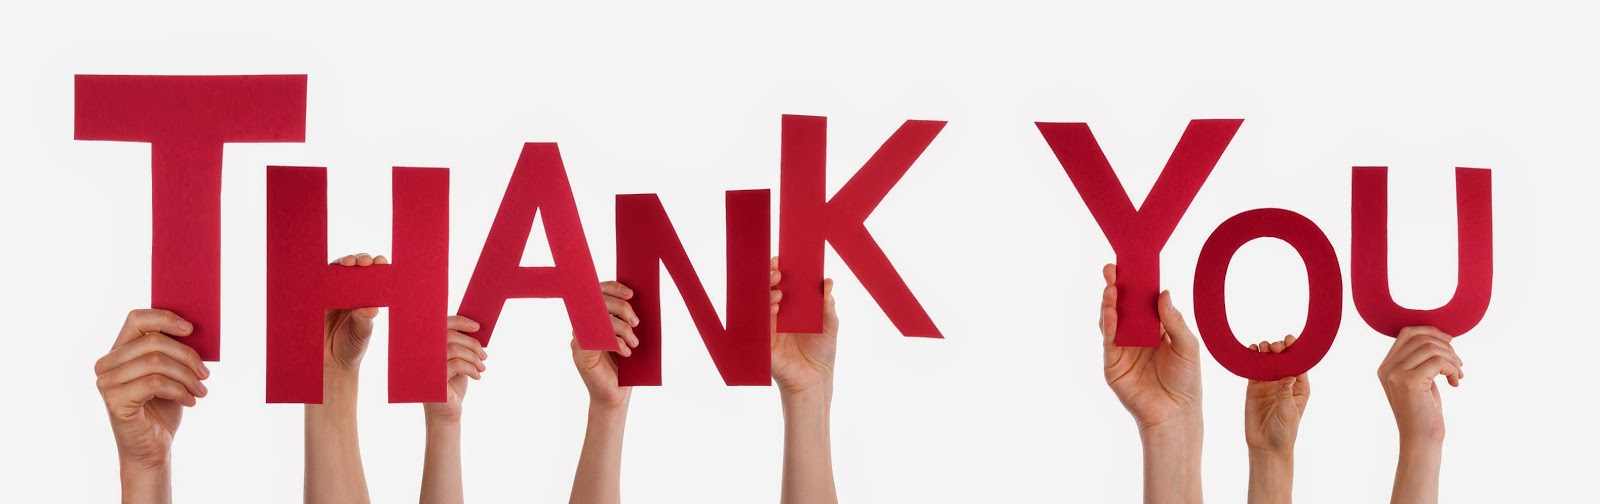